# Metadata training

Idea: use MLP on metadata to predict labels.

First, process labels into one-hot encoded vector.

In [18]:
%load_ext autoreload
%autoreload 2
from data_provider import DataProvider
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Initialize data provider class
dp = DataProvider(clustering_method='dbscan', debug=True)
cluster_config = {
    'eps': 0.1,
    'min_samples': 10
}

Reading labels.
Reading metadata.
Reading music_analysis.


In [33]:
dp.generate_training_classes(config=cluster_config)
dp.labels_df.head()

Clustering mbtag_embedding.


,mbtag,mbtag_embedding,cluster
song_id,,,
SOVVDCO12AB0187AF7,"[fusion, jazz fusion, classic pop and rock]","[-0.09234456, 0.09288454, -0.009184127, -0.023...",0
SOKSZVC12A8C142004,[finnish],"[-0.14119178, 0.12613417, -0.009287859, -0.014...",0
SOZQSGL12AF72A9145,"[punk, california, san francisco, rock and ind...","[-0.116643086, 0.108250156, 0.01448074, -0.016...",0
SOBHQIJ12A6D4FC7D3,"[old school hip-hop, hip-hop, american, rock a...","[-0.099780515, 0.09995292, 0.005859726, 0.0056...",0
SODENZR12AAF3B13B9,[folk],"[-0.10750839, 0.09862709, -0.012248771, -0.009...",0


In [34]:
distinct_clusters = dp.labels_df['cluster'].nunique()
print(distinct_clusters)

9


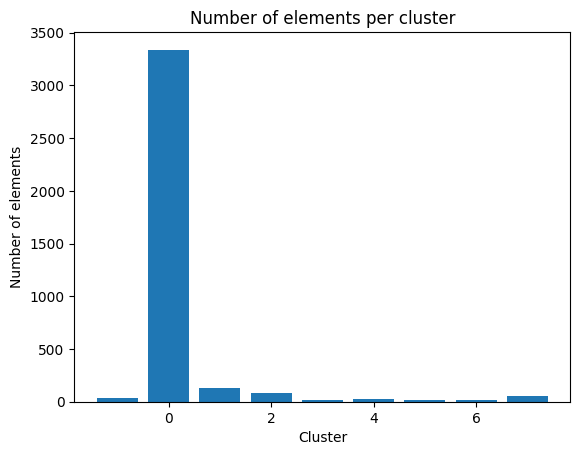

In [35]:
counts = pd.DataFrame(dp.labels_df['cluster']).value_counts()
counts = counts.reset_index()
counts.columns = ['cluster', 'count']
plt.bar(x=counts['cluster'], height=counts['count'])
plt.title('Number of elements per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of elements')
plt.show()